In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

FONT_TITLE = 20
FONT_LABEL = 15

path_data = '/content/drive/MyDrive/Colab Notebooks/data/it-volunteer/'  #путь к файлам на диске Алсу

In [63]:
# Загружаем данные
df_m = pd.read_excel(path_data+'Выборка компаний Москва.xlsx', sheet_name='report', header=3)
df_r = pd.read_excel(path_data+'Организации кроме Москвы.xlsx', sheet_name='report', header=3)

In [118]:
# Объединим в один датасет
df = pd.concat([df_m, df_r], axis=0, ignore_index=True)

In [119]:
# Удалим колонку №
df = df.drop('№', axis=1)

In [120]:
# Пропуски в регистрационных данных
df.isna().sum()[:10]

Наименование                      0
Регистрационный номер            10
Дата регистрации                  0
Статус                            0
Код налогоплательщика             7
Регион регистрации                0
Код ОКАТО                         0
Наименование ОКАТО                0
Код ОКТМО                        22
Организационно-правовая форма     0
dtype: int64

## Регистрационный номер

In [121]:
df[df['Регистрационный номер'].isna()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог н

In [122]:
# По ИНН  базе егрюл выдается 'По заданным критериям поиска данных не найдено'. 
# Данных по годам по ним нет. 
df[df['Регистрационный номер'].isna()].isna().sum().value_counts()

10    151
0       9
1       1
dtype: int64

In [123]:
# Удалим эти организации.
df = df.drop(df[df['Регистрационный номер'].isna()].index, axis=0)

# Регистрационный номер и Код налогоплательщика преобразуем в формат int
df['Регистрационный номер'] = df['Регистрационный номер'].astype(int)
df['Код налогоплательщика'] = df['Код налогоплательщика'].apply(lambda i: i if pd.isna(i) else int(i))

## Дата создания организации

In [124]:
# У НО БФ "ЖАРПТИЦА" дата регистрации - 01.03.2001 с сайта ЕГРЮЛ, а не 1899-12-30  
display(df[df['Регистрационный номер']==1037739450891][['Наименование', 'Дата регистрации']])

# Заменим на верную дату
df['Дата регистрации'].loc[1185] = pd.to_datetime('01.03.2001', format='%d.%m.%Y')

# Проверим
display(df[df['Регистрационный номер']==1037739450891][['Наименование', 'Дата регистрации']])

,Наименование,Дата регистрации
1185,"ЖАР-ПТИЦА, ФОНД",30.12.1899


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Наименование,Дата регистрации
1185,"ЖАР-ПТИЦА, ФОНД",2001-03-01 00:00:00


In [125]:
# Сформируем новый признак - год регистрации
df['Год_регистрации'] = df['Дата регистрации'].apply(lambda d: d.year)

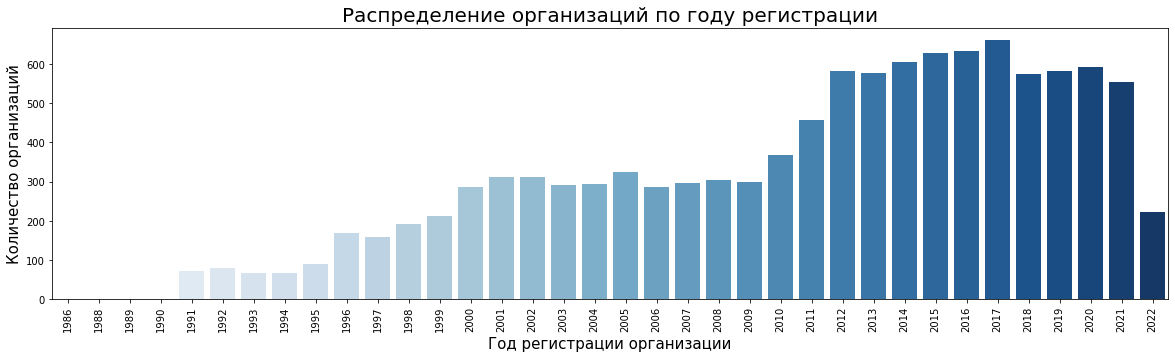

In [126]:
plt.figure(figsize=(20,5))
plt.title('Распределение организаций по году регистрации', fontsize=FONT_TITLE)
sns.countplot(x=df['Год_регистрации'],  palette='Blues')
plt.ylabel('Количество организаций', fontsize=FONT_LABEL)
plt.xlabel('Год регистрации организации', fontsize=FONT_LABEL)
plt.xticks(rotation=90)
plt.show()

По графику видно, что резкий рост количества регистраций благотворительных НКО был в 1996, 2000 и 2010-2012

In [127]:
df['Статус'].value_counts()

Действующая       11154
Реорганизуется        6
Ликвидируется         2
Name: Статус, dtype: int64

## Регион регистрации

In [128]:
df['Регион регистрации'].value_counts(normalize=True)

Москва                                0.33
Московская область                    0.06
Санкт-Петербург                       0.06
Республика Татарстан                  0.03
Башкортостан (Республика)             0.03
Свердловская область                  0.02
Краснодарский край                    0.02
Дагестан (Республика)                 0.02
Ростовская область                    0.02
Новосибирская область                 0.02
Иркутская область                     0.02
Красноярский край                     0.02
Самарская область                     0.02
Тюменская область                     0.02
Нижегородская область                 0.02
Челябинская область                   0.01
Пермский край                         0.01
Омская область                        0.01
Республика Крым                       0.01
Волгоградская область                 0.01
Воронежская область                   0.01
Ставропольский край                   0.01
Алтайский край                        0.01
Кемеровская

In [129]:
df['Регион регистрации'].value_counts()

Москва                                 3645
Московская область                      702
Санкт-Петербург                         664
Республика Татарстан                    317
Башкортостан (Республика)               284
Свердловская область                    258
Краснодарский край                      249
Дагестан (Республика)                   238
Ростовская область                      215
Новосибирская область                   209
Иркутская область                       204
Красноярский край                       202
Самарская область                       200
Тюменская область                       183
Нижегородская область                   177
Челябинская область                     163
Пермский край                           163
Омская область                          142
Республика Крым                         112
Волгоградская область                    97
Воронежская область                      96
Ставропольский край                      95
Алтайский край                  

В выборке представлено 83 региона. 

1/3 часть организаций зарегистрирована в Москве. По 6% от представленного количества в МО и Санкт-Петербурге. Далее по нисходящей. Есть и такие регионы, в которых зарегистрировано всего несколько НО. 

### Анализ пропусков в данных

Есть организации, которые не подали никаких сведений за весь период с 2017 по 2021 год.
Сведения о деятельности фондов содержатся в столбцах с 11 по 160. Удалим строки с данными этих организация (по условию, что все ячейки в столбцах 11-160 пустые)

In [131]:
#количество фондов в таблице на текущий момент
df.shape

(11162, 162)

In [132]:
df.dropna(subset=list(df.columns[11:161]),how='all', inplace=True)

In [133]:
df.shape

(6838, 162)

Из представленных в исходных данных более чем 11 тыс. фондов финансовую отчетность за 2017-2021 предоставляли лишь 6838 организаций. В дальнейшем будем анализировать только их. 

Также в таблице имеются пустые столбцы (доля пропусков -100%)

In [135]:
#выводим список пустых столбцов
df_null_percent=df.isnull().mean()*100
df_null_percent[df_null_percent==100]

2019, Среднесписочная численность работников   100.00
2020, Среднесписочная численность работников   100.00
2021, Среднесписочная численность работников   100.00
2017, Доходы, RUB                              100.00
2018, Доходы, RUB                              100.00
2019, Доходы, RUB                              100.00
2020, Доходы, RUB                              100.00
2021, Доходы, RUB                              100.00
2017, Расходы, RUB                             100.00
2018, Расходы, RUB                             100.00
2019, Расходы, RUB                             100.00
2020, Расходы, RUB                             100.00
2021, Расходы, RUB                             100.00
dtype: float64

С 2019 года фонды перестали подавать информацию о численности сотрудников.
Столбцы доходов и расходов пустые, будем использовать их в качестве нового признака - суммарных доходов и расходов

In [ ]:
### добавить значения с суммами доходов и расходов, исходные удалить

## Данные по отчетности

**Данные за 2017-2021 года, которые представлены в выборке:**
- Среднесписочная численность работников,
- Доходы, RUB,
- Расходы, RUB,
- Дебиторская задолженность, RUB,
- Денежные средства и денежные эквиваленты, RUB,
- Капитал и резервы, RUB,
- Заёмные средства (краткосрочные), RUB,
- Кредиторская задолженность, RUB,
- Пассивы всего, RUB,
- Выручка, RUB,
- Себестоимость продаж, RUB,
- Валовая прибыль (убыток), RUB,
- Коммерческие расходы, RUB,
- Управленческие расходы, RUB,
- Прибыль (убыток) от продажи, RUB,
- Доходы от участия в других организациях, RUB,
- Проценты к получению, RUB,
- Проценты к уплате, RUB,
- Прочие доходы, RUB,
- Прочие расходы, RUB,
- Прибыль (убыток) до налогообложения , RUB,
- Текущий налог на прибыль, RUB,
- Чистая прибыль (убыток), RUB,
- Прибыль от приносящей доход деятельности, RUB,
- Всего поступило средств, RUB,
- Расходы на целевые мероприятия, RUB,
- Расходы на содержание аппарата управления, RUB,
- Приобретение основных средств, инвентаря и иного имущества, RUB,
- Всего использовано средств, RUB,
- Остаток средств на конец отчетного года, RUB,

In [136]:
otch_col = ['Среднесписочная численность работников', 'Доходы, RUB', 'Расходы, RUB', 'Дебиторская задолженность, RUB', 'Денежные средства и денежные эквиваленты, RUB',
            'Капитал и резервы, RUB', 'Заёмные средства (краткосрочные), RUB', 'Кредиторская задолженность, RUB', 'Пассивы всего, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB',
            'Валовая прибыль (убыток), RUB', 'Коммерческие расходы, RUB', 'Управленческие расходы, RUB', 'Прибыль (убыток) от продажи, RUB', 'Доходы от участия в других организациях, RUB',
            'Проценты к получению, RUB', 'Проценты к уплате, RUB', 'Прочие доходы, RUB', 'Прочие расходы, RUB', 'Прибыль (убыток) до налогообложения , RUB',
            'Текущий налог на прибыль, RUB', 'Чистая прибыль (убыток), RUB', 'Прибыль от приносящей доход деятельности, RUB', 'Всего поступило средств, RUB', 'Расходы на целевые мероприятия, RUB',
            'Расходы на содержание аппарата управления, RUB', 'Приобретение основных средств, инвентаря и иного имущества, RUB', 'Всего использовано средств, RUB', 'Остаток средств на конец отчетного года, RUB']

Посмотрим какие организации не сдавали отчетнсоть в контролирующие органы, чтоб в дальнейшем их исключить из анализа.

У нас есть оганизации, которые зарегистрированы в 2022 году. И соответсственно отчетности у них не будет.

И так же много организаций зарегистрировано с 2018 по 2021 - значит отчетность должна быть только за период.


### 2017 год

In [137]:
col_2017 = ['2017, ' + el for el in otch_col]
df_2017 = df[df['Год_регистрации'] <= 2017][['Регистрационный номер']+col_2017]
print('Организации, обязанные сдать отчет в 2017 году:', df_2017.shape[0], '\n')
df_2017.isna().sum()

Организации, обязанные сдать отчет в 2017 году: 5696 



Регистрационный номер                                                       0
2017, Среднесписочная численность работников                             3083
2017, Доходы, RUB                                                        5696
2017, Расходы, RUB                                                       5696
2017, Дебиторская задолженность, RUB                                     3486
2017, Денежные средства и денежные эквиваленты, RUB                      2131
2017, Капитал и резервы, RUB                                             2268
2017, Заёмные средства (краткосрочные), RUB                              5314
2017, Кредиторская задолженность, RUB                                    3528
2017, Пассивы всего, RUB                                                 1652
2017, Выручка, RUB                                                       5169
2017, Себестоимость продаж, RUB                                          5280
2017, Валовая прибыль (убыток), RUB                             

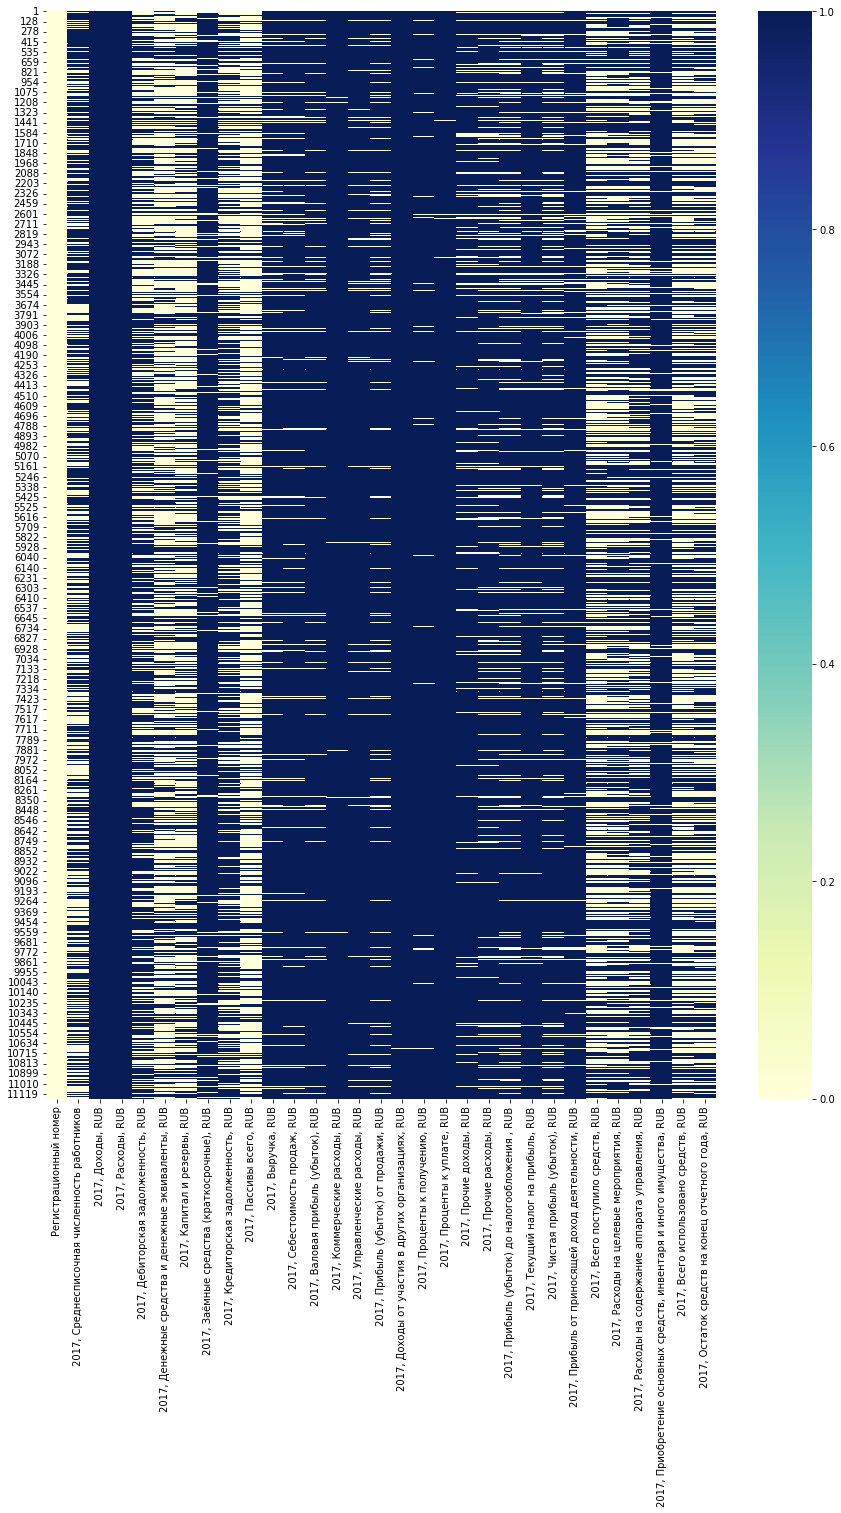

In [138]:
#визуализация пропусков в данных компаний, обязанных сдать отчетность за 2017 год
fig,axes=plt.subplots(figsize=(15,20))
sns.heatmap(df_2017.isnull(),cmap='YlGnBu');

In [ ]:
df_2017.isna().sum(axis=1).value_counts(normalize=True)

30   0.43
21   0.06
22   0.06
29   0.06
20   0.05
27   0.05
19   0.04
26   0.04
23   0.04
24   0.03
25   0.03
18   0.02
28   0.02
15   0.01
16   0.01
14   0.01
17   0.01
12   0.01
13   0.01
11   0.01
10   0.00
9    0.00
8    0.00
7    0.00
6    0.00
dtype: float64

In [ ]:
df_2017.shape

(7973, 31)

In [ ]:
col_2018 = ['2018, ' + el for el in otch_col]
df[df['Год_регистрации'] < 2018][col_2018].isna().sum()

2018, Среднесписочная численность работников                             8579
2018, Доходы, RUB                                                        8633
2018, Расходы, RUB                                                       8633
2018, Дебиторская задолженность, RUB                                     6262
2018, Денежные средства и денежные эквиваленты, RUB                      4923
2018, Капитал и резервы, RUB                                             5014
2018, Заёмные средства (краткосрочные), RUB                              8250
2018, Кредиторская задолженность, RUB                                    6341
2018, Пассивы всего, RUB                                                 4426
2018, Выручка, RUB                                                       8050
2018, Себестоимость продаж, RUB                                          8179
2018, Валовая прибыль (убыток), RUB                                      8176
2018, Коммерческие расходы, RUB                                 

In [ ]:
col_2019 = ['2019, ' + el for el in otch_col]
df[df['Год_регистрации'] < 2019][col_2019].isna().sum()

2019, Среднесписочная численность работников                             9208
2019, Доходы, RUB                                                        9208
2019, Расходы, RUB                                                       9208
2019, Дебиторская задолженность, RUB                                     6635
2019, Денежные средства и денежные эквиваленты, RUB                      5220
2019, Капитал и резервы, RUB                                             6300
2019, Заёмные средства (краткосрочные), RUB                              8811
2019, Кредиторская задолженность, RUB                                    6772
2019, Пассивы всего, RUB                                                 4672
2019, Выручка, RUB                                                       8558
2019, Себестоимость продаж, RUB                                          8671
2019, Валовая прибыль (убыток), RUB                                      8779
2019, Коммерческие расходы, RUB                                 

In [ ]:
df_m.iloc[1185]

In [ ]:
3647

In [ ]:
df_m['Год_регистрации'] = 